# 1. Carga y Limpieza de Datos

Carga tu set de datos y realiza las tareas de limpieza y normalización necesarias.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/overbuff_ana_rankings_with_full_stats.csv')

# Convertir 'Skill Tier' a un valor numérico usando LabelEncoder
skill_tiers = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'Grandmaster']
df['Skill Tier'] = pd.Categorical(df['Skill Tier'], categories=skill_tiers, ordered=True).codes

# Excluir la columna 'Player'
df = df.drop(columns=['Player'])

# Convertir 'win_percentage' a formato decimal
df['win_percentage'] = df['win_percentage'].astype(float) / 100.0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Mostrar las primeras filas para confirmar la carga correcta
df.head()

,Skill Tier,time_played,games_won,win_percentage,weapon_accuracy_best_in_game,eliminations_per_life,kill_streak_best,eliminations_avg_per_10_min,deaths_avg_per_10_min,final_blows_avg_per_10_min,...,healing_done_avg_per_10_min,scoped_accuracy_best_in_game,self_healing,self_healing_most_in_game,enemies_slept,nano_boost_assists,unscoped_accuracy_best_in_game,enemies_slept_most_in_game,nano_boost_assists_most_in_game,biotic_grenade_kills
0,0,6690,7,0.61,24,2.33,11,12.56,5.38,3.59,...,6287,86,2004,335,72,37,57,10,11,71
1,0,51987,53,0.65,49,2.77,16,13.25,4.78,3.99,...,6208,100,8347,391,589,228,76,17,10,512
2,0,1680,0,0.05,29,1.00,5,9.29,9.29,1.79,...,5352,50,1329,606,25,0,57,8,0,13
3,0,8759,9,0.61,25,1.29,6,9.45,7.33,2.40,...,6657,100,1508,385,88,25,51,12,5,87
4,0,3793,1,0.21,38,1.92,8,10.92,5.69,4.75,...,6903,69,1907,585,35,12,65,11,4,30


In [50]:
df.tail()

,Skill Tier,time_played,games_won,win_percentage,weapon_accuracy_best_in_game,eliminations_per_life,kill_streak_best,eliminations_avg_per_10_min,deaths_avg_per_10_min,final_blows_avg_per_10_min,...,healing_done_avg_per_10_min,scoped_accuracy_best_in_game,self_healing,self_healing_most_in_game,enemies_slept,nano_boost_assists,unscoped_accuracy_best_in_game,enemies_slept_most_in_game,nano_boost_assists_most_in_game,biotic_grenade_kills
592,6,20795,15,0.55,50,1.45,10,8.54,5.89,1.90,...,9272,82,10880,731,164,100,120,12,8,134
593,6,6603,7,0.66,50,1.73,9,9.45,5.45,1.64,...,7723,73,2029,558,40,24,64,4,4,42
594,6,4563,5,0.62,31,1.38,7,8.15,5.92,1.45,...,8988,81,2395,476,42,30,68,12,8,28
595,6,801,1,1.00,17,2.14,7,11.24,5.24,2.25,...,10000,69,435,435,9,6,51,9,6,7
596,6,20374,18,0.63,41,1.42,8,7.27,5.12,1.53,...,8909,80,10259,982,143,77,77,9,7,100


# 2. Selección y Normalización de las Características

Excluimos win_percentage de las características y utilizamos solo las características numéricas y categóricas relevantes.

In [48]:
# Seleccionar las características y la variable objetivo
features = ['time_played', 'games_won', 'win_percentage', 'weapon_accuracy_best_in_game', 'eliminations_per_life',
            'kill_streak_best', 'eliminations_avg_per_10_min', 'deaths_avg_per_10_min',
            'final_blows_avg_per_10_min', 'solo_kills_avg_per_10_min', 'objective_kills_avg_per_10_min',
            'objective_time_avg_per_10_min', 'hero_damage_done_avg_per_10_min', 'healing_done_avg_per_10_min',
            'scoped_accuracy_best_in_game', 'self_healing', 'self_healing_most_in_game', 'enemies_slept',
            'nano_boost_assists', 'unscoped_accuracy_best_in_game', 'enemies_slept_most_in_game',
            'nano_boost_assists_most_in_game', 'biotic_grenade_kills']

X = df[features].values
y = df['Skill Tier'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Verificar las columnas en el DataFrame
print("Columnas en el DataFrame:", df.columns.tolist())
print("Número de características en el DataFrame:", X.shape[1])
extra_columns = set(df.columns) - set(features)
print("Columnas adicionales en el DataFrame:", extra_columns)

Columnas en el DataFrame: ['Skill Tier', 'time_played', 'games_won', 'win_percentage', 'weapon_accuracy_best_in_game', 'eliminations_per_life', 'kill_streak_best', 'eliminations_avg_per_10_min', 'deaths_avg_per_10_min', 'final_blows_avg_per_10_min', 'solo_kills_avg_per_10_min', 'objective_kills_avg_per_10_min', 'objective_time_avg_per_10_min', 'hero_damage_done_avg_per_10_min', 'healing_done_avg_per_10_min', 'scoped_accuracy_best_in_game', 'self_healing', 'self_healing_most_in_game', 'enemies_slept', 'nano_boost_assists', 'unscoped_accuracy_best_in_game', 'enemies_slept_most_in_game', 'nano_boost_assists_most_in_game', 'biotic_grenade_kills']
Número de características en el DataFrame: 23
Columnas adicionales en el DataFrame: {'Skill Tier'}


# Plot de datos

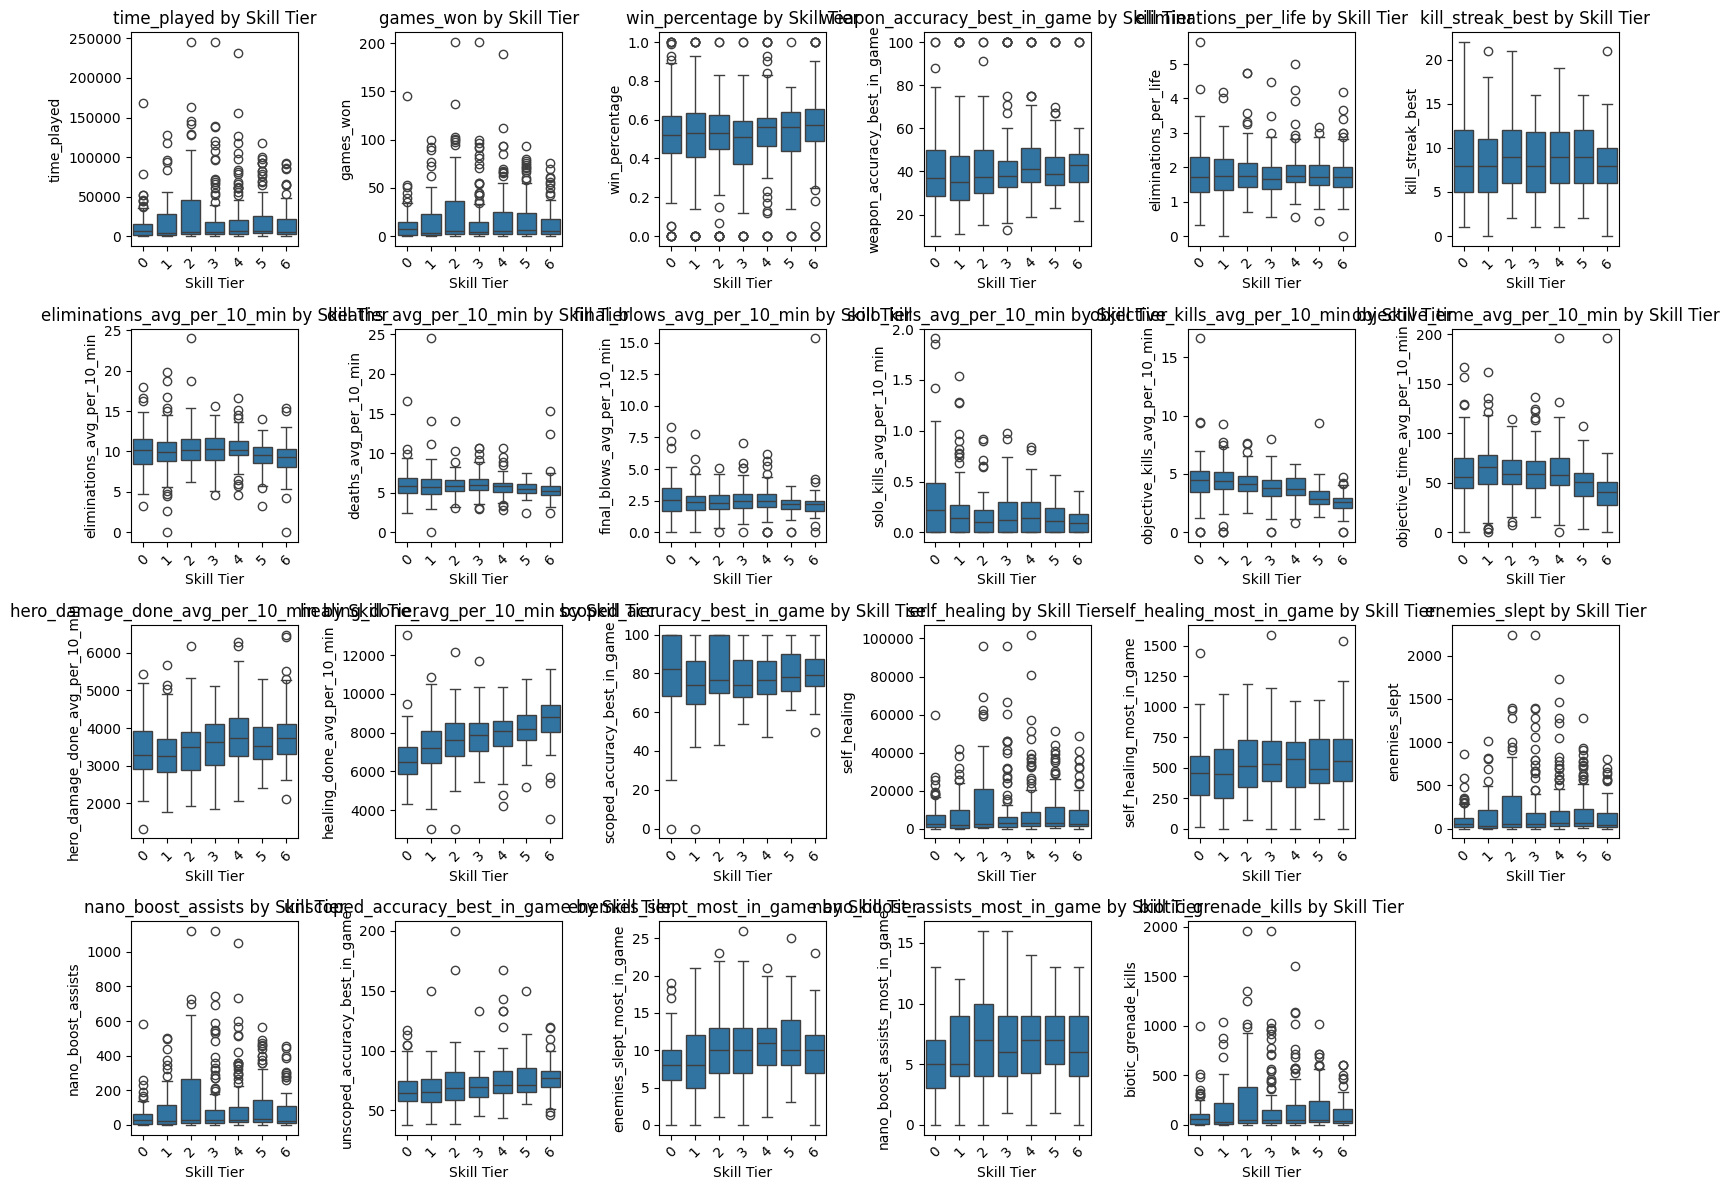

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(x='Skill Tier',y=feature,data=df);
    #sns.barplot(x='Skill Tier',y=feature,data=df,estimator=np.std);
    #sns.violinplot(x='Skill Tier', y=feature, data=df)
    plt.title(f'{feature} by Skill Tier')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Construcción Modelo

Construcción y entrenamiento del modelo.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico
y_train_cat = to_categorical(y_train, num_classes=len(skill_tiers))
y_test_cat = to_categorical(y_test, num_classes=len(skill_tiers))

# Construir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(skill_tiers), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.compile(optimizer=Adam(learning_rate=0.001),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

# Configurar EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size=50,
                    validation_split=0.2,
                    #callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1424 - loss: 2.3528 - val_accuracy: 0.1562 - val_loss: 2.0763
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1960 - loss: 2.2081 - val_accuracy: 0.1979 - val_loss: 2.0120
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1761 - loss: 2.2583 - val_accuracy: 0.2292 - val_loss: 1.9728
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1526 - loss: 2.1361 - val_accuracy: 0.2396 - val_loss: 1.9445
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2051 - loss: 2.0074 - val_accuracy: 0.2292 - val_loss: 1.9280
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1905 - loss: 2.0446 - val_accuracy: 0.2083 - val_loss: 1.9198
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1917 - loss: 1.9879 - val_accuracy: 0.2188 - val_loss: 1.9139
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1597 - loss: 2.0455 - val_accuracy: 0.2292 - val_loss: 1.9088
Epoch 9/10

# 4. Evaluación del Modelo

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Hacer predicciones
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
predicted_skill_tiers = [skill_tiers[i] for i in predicted_classes]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4098 - loss: 1.6273 
Test Accuracy: 0.3917
Test Loss: 1.6011
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# 5. Predicción y Recomendaciones

Utilizamos el modelo para predecir el win_percentage de un jugador específico y proporcionar recomendaciones.

# 5.1 Método para buscar la data del jugador

In [ ]:
import requests

def get_player_data(player):
  intentos=0
  continuar=True
  nick, number = player.split('#')
  data=None
  while intentos < 3 and continuar :
    api_url = f'https://overfast-api.tekrop.fr/players/{nick}-{number}'
    response = requests.get(api_url, headers = {'User-agent': 'your bot 0.1'})
    if response.status_code == 200:
        intentos=4
        continuar=False
        try:
            data = response.json()
        except ValueError:
            print(f"No se pudo decodificar el JSON para el jugador {player}.")
    else:
        intentos=intentos+1
        print(f"Error al obtener datos para {player}: {response.status_code}.")
  return data

def get_player_stats(player):
  data = get_player_data(player)
  campos_cero=0
  if data:

    # Campos de interés en heroes_comparisons
    attributes = [
        'time_played', 'games_won', 'win_percentage', 'weapon_accuracy_best_in_game',
        'eliminations_per_life', 'kill_streak_best', 'eliminations_avg_per_10_min',
        'deaths_avg_per_10_min', 'final_blows_avg_per_10_min', 'solo_kills_avg_per_10_min',
        'objective_kills_avg_per_10_min', 'objective_time_avg_per_10_min',
        'hero_damage_done_avg_per_10_min', 'healing_done_avg_per_10_min'
    ]

    # Campos adicionales de carrera para Ana
    additional_fields = [
        'scoped_accuracy_best_in_game', 'self_healing', 'self_healing_most_in_game',
        'enemies_slept', 'nano_boost_assists', 'unscoped_accuracy_best_in_game',
        'enemies_slept_most_in_game', 'nano_boost_assists_most_in_game',
        'biotic_grenade_kills'
    ]

    ana_stats = {}

    # Buscar los valores en heroes_comparisons
    heroes_comparisons = data['stats']['pc']['competitive']['heroes_comparisons']
    for attr in attributes:
      if attr in heroes_comparisons and heroes_comparisons[attr]:
          attr_values = heroes_comparisons[attr]['values']
          # Buscar el valor para el héroe 'ana'
          ana_data = next((item for item in attr_values if item['hero'] == 'ana'), None)
          ana_stats[attr] = ana_data['value'] if ana_data else None
      else:
          ana_stats[attr] = 0
          campos_cero=campos_cero+1

    # Buscar los valores en career_stats para Ana
    try:
      #print(player)
      if data['stats']['pc']['competitive']['career_stats']['ana']:
        career_stats = data['stats']['pc']['competitive']['career_stats'].get('ana', [{}])[0]
        # Extraer los campos adicionales
        for field in additional_fields:
            ana_stats[field] = next((stat['value'] for stat in career_stats.get('stats', []) if stat['key'] == field), None)
      else:
        #Si no hay datos específicos para el heroe se retorna None
        return None
    except KeyError as e:
        print(f"Error de clave en career_stats: {e}")
        #Si no hay datos específicos para el heroe se retorna None
        return None
    if campos_cero>10:
      #Si hay mas de 10 campos vacios de stats en general para el heroe se retorna None
      return None
    else:
      return ana_stats
  else:
    print(f"Perfil privado o datos no disponibles para {player}.")
    return None


# 5.2 Test predicción

In [ ]:
# Ejemplo de predicción para un nuevo jugador
#player_stats = np.array([[6690, 7, 0.80, 24, 2.33, 11, 12.56, 5.38, 3.59, 0.27, 5.56, 55, 3535, 6287, 86, 2004, 335, 72, 37, 57, 10, 11, 71]])
stats=get_player_stats("Price#11160")
if stats:
  player_stats = np.array(list(stats.values())).reshape(1, -1)
  #print(player_stats)

  # Normalizar y predecir
  player_stats_normalized = scaler.transform(player_stats)
  predicted_tier = model.predict(player_stats_normalized)
  predicted_tier_class = predicted_tier.argmax(axis=1)[0]
  predicted_skill_tier = skill_tiers[predicted_tier_class]
  print(f"Predicted Skill Tier: {predicted_skill_tier}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Skill Tier: Grandmaster
